In [78]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=6)

import warnings
warnings.simplefilter(action='ignore')

#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [79]:
# Read CSV
file_name1 = 'stroke.csv'
stroke_df = pd.read_csv(file_name1)

# preview data
print(stroke_df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [80]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


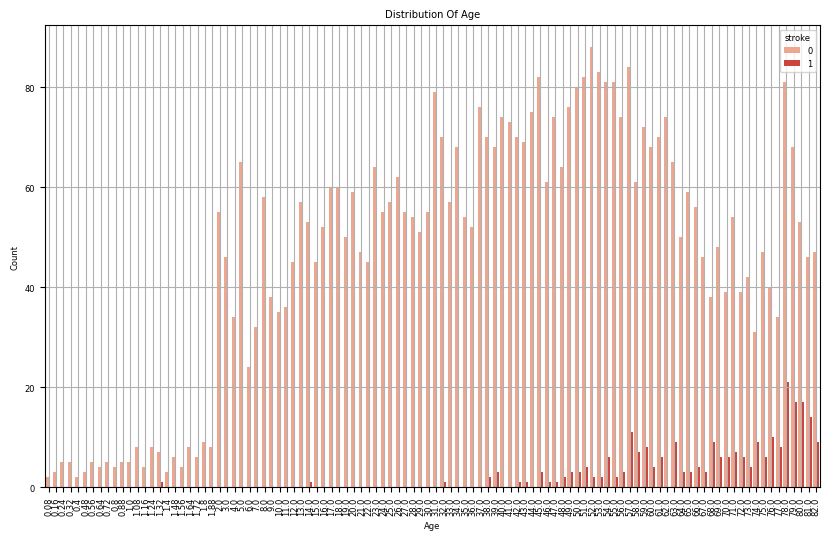

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.title("Distribution Of Age")
plt.grid(True)
plt.show()


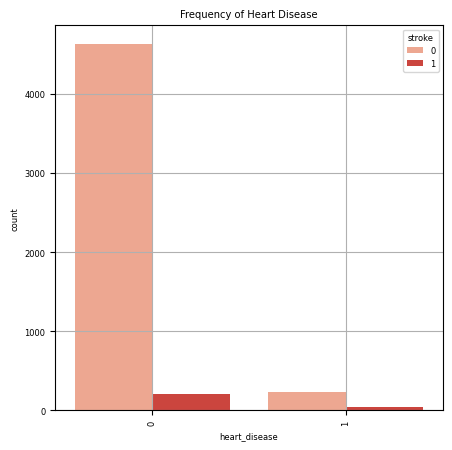

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('heart_disease')
plt.ylabel('count')
plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees

plt.title("Frequency of Heart Disease")
plt.grid(True)
plt.show()


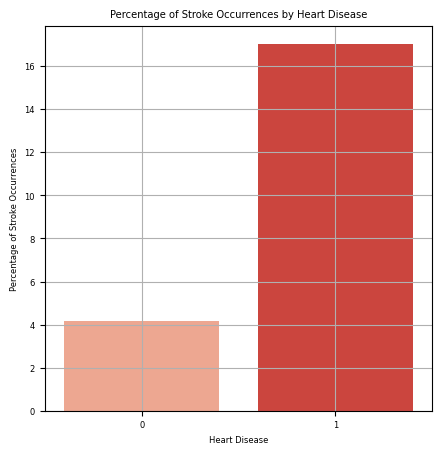

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of stroke occurrences within each category of heart disease
heart_disease_stroke_percentage = stroke_df.groupby('heart_disease')['stroke'].mean() * 100

plt.figure(figsize=(5, 5))
sns.barplot(x=heart_disease_stroke_percentage.index, y=heart_disease_stroke_percentage.values, palette='Reds')
plt.xlabel('Heart Disease')
plt.ylabel('Percentage of Stroke Occurrences')
plt.title("Percentage of Stroke Occurrences by Heart Disease")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


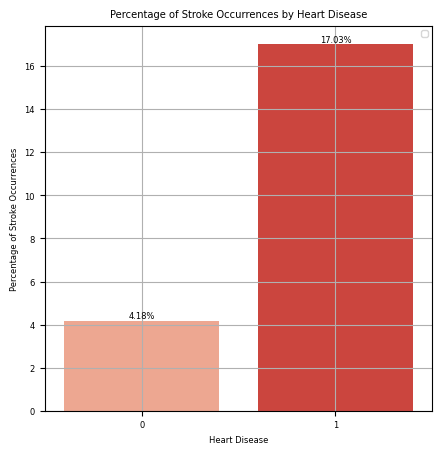

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of stroke occurrences within each category of heart disease
heart_disease_stroke_percentage = stroke_df.groupby('heart_disease')['stroke'].mean() * 100

plt.figure(figsize=(5, 5))
sns.barplot(x=heart_disease_stroke_percentage.index, y=heart_disease_stroke_percentage.values, palette='Reds')
plt.xlabel('Heart Disease')
plt.ylabel('Percentage of Stroke Occurrences')
plt.legend()
plt.title("Percentage of Stroke Occurrences by Heart Disease")
plt.grid(True)

# Add legend
for i, percentage in enumerate(heart_disease_stroke_percentage.values):
    plt.text(i, percentage, f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

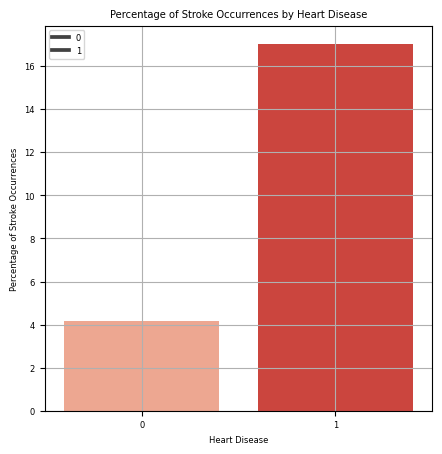

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of stroke occurrences within each category of heart disease
heart_disease_stroke_percentage = stroke_df.groupby('heart_disease')['stroke'].mean() * 100

plt.figure(figsize=(5, 5))

# Create the bar plot
sns.barplot(x=heart_disease_stroke_percentage.index, y=heart_disease_stroke_percentage.values, palette='Reds')

plt.xlabel('Heart Disease')
plt.ylabel('Percentage of Stroke Occurrences')
plt.title("Percentage of Stroke Occurrences by Heart Disease")
plt.grid(True)

# Add legend
plt.legend(heart_disease_stroke_percentage.index)

plt.show()

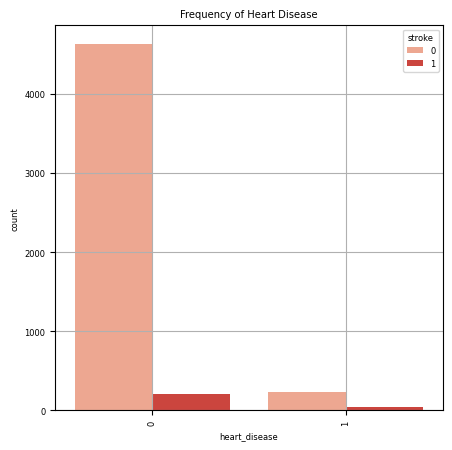

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('heart_disease')
plt.ylabel('count')
plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees

plt.title("Frequency of Heart Disease")
plt.grid(True)
plt.show()


In [87]:
#Checking for missing values
print(stroke_df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

feature_columns = ['age']  # List of feature columns
target_column = ['stroke']   # Target column

X = stroke_df[feature_columns]
y = stroke_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)


In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [90]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [91]:
correlation = stroke_df['age'].corr(stroke_df['stroke'])
correlation

0.24525734617097447

In [104]:
correlation1 = stroke_df['avg_glucose_level'].corr(stroke_df['stroke'])
correlation1

0.13893586200507013

In [93]:
correlation2 = stroke_df['bmi'].corr(stroke_df['stroke'])
correlation2

0.04237366114923359

<AxesSubplot:>

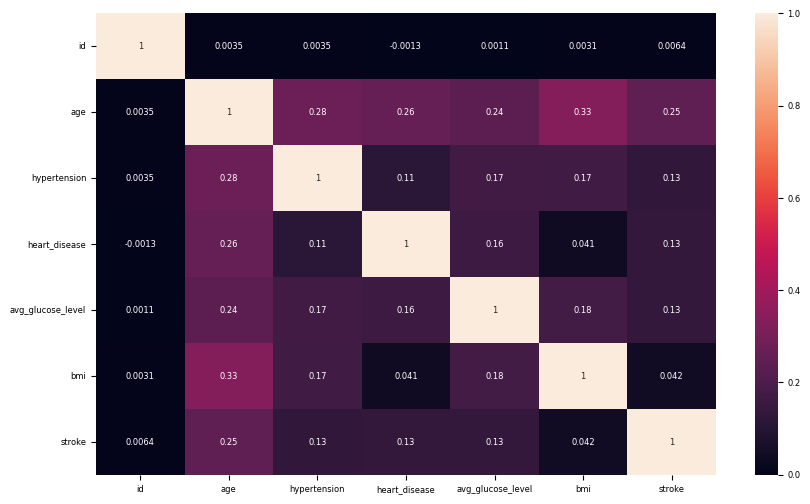

In [94]:
plt.figure(figsize=(10,6))
sns.heatmap(stroke_df.corr(),annot=True)

In [95]:
print("Correlation between variables:")
print(correlation)

Correlation between variables:
0.24525734617097447


In [96]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

Random Forest Cross-Validation Scores: [0.95476773 0.95354523 0.95354523 0.95471236 0.95471236]
Mean Accuracy: 0.9542565830622498


In [97]:
feature_importance_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({"Feature": feature_columns, "Importance": feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by="Importance", ascending=False)
print("Random Forest Feature Importance:")
print(feature_importance_df_rf)

Random Forest Feature Importance:
  Feature  Importance
0     age         1.0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Drop rows with missing values
stroke_df.dropna(inplace=True)

# Separate features and target variable
X = stroke_df.drop(columns=["id", "stroke"])
y = stroke_df["stroke"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ["age", "avg_glucose_level", "bmi"]
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the classifier pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier(hidden_layer_sizes=(100, 100),
                                                   activation='relu',  
                                                   solver='adam',
                                                   max_iter=50,
                                                   random_state=42))])

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.945010183299389


Epoch 1/50
123/123 - 1s - 10ms/step - accuracy: 0.9358 - loss: 0.2683 - val_accuracy: 0.9460 - val_loss: 0.1903
Epoch 2/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1506 - val_accuracy: 0.9460 - val_loss: 0.1741
Epoch 3/50
123/123 - 0s - 2ms/step - accuracy: 0.9600 - loss: 0.1451 - val_accuracy: 0.9460 - val_loss: 0.1727
Epoch 4/50
123/123 - 0s - 2ms/step - accuracy: 0.9600 - loss: 0.1474 - val_accuracy: 0.9460 - val_loss: 0.1681
Epoch 5/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1408 - val_accuracy: 0.9460 - val_loss: 0.1676
Epoch 6/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1387 - val_accuracy: 0.9460 - val_loss: 0.1682
Epoch 7/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1343 - val_accuracy: 0.9460 - val_loss: 0.1710
Epoch 8/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1365 - val_accuracy: 0.9460 - val_loss: 0.1709
Epoch 9/50
123/123 - 0s - 3ms/step - accuracy: 0.9603 - loss: 0.1401 - val_accuracy: 0.9460 - val_loss: 0.1674


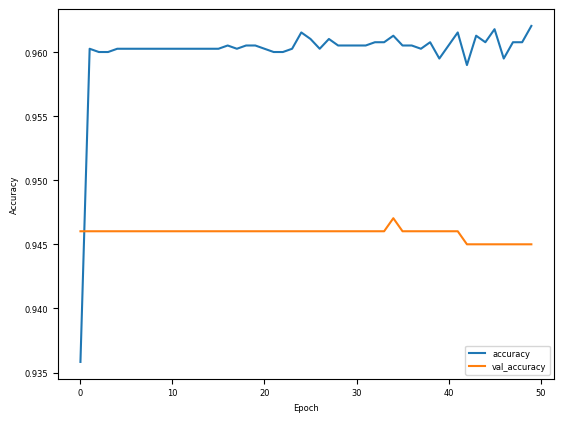

In [99]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

stroke_df.dropna(inplace=True)

label_encoders = {}
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    stroke_df[col] = label_encoders[col].fit_transform(stroke_df[col])

X = stroke_df.drop(columns=['stroke'])
y = stroke_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9460285132382892
Confusion Matrix:
 [[929   0]
 [ 53   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



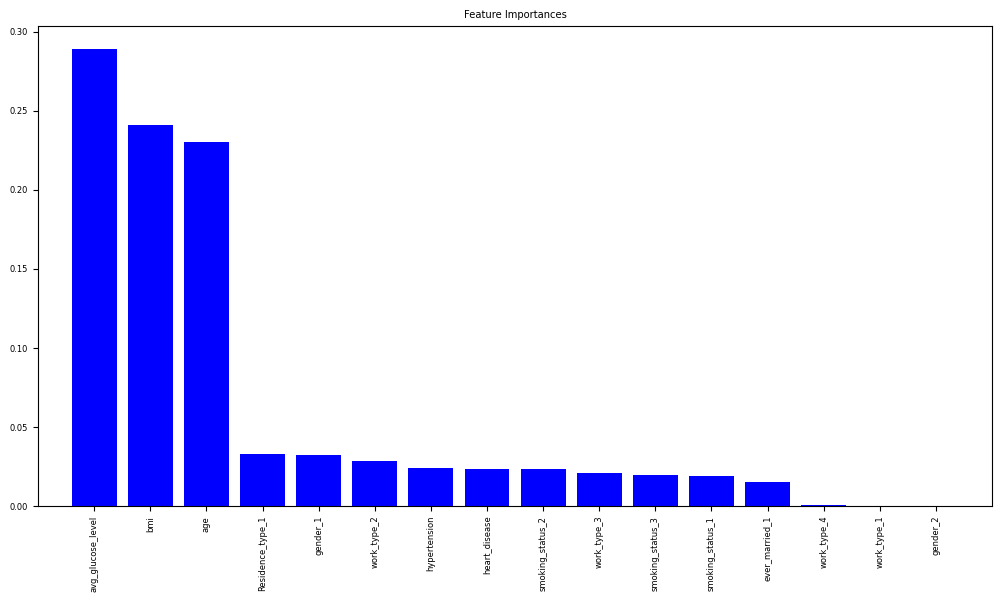

In [100]:
stroke_df = pd.get_dummies(stroke_df, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], drop_first=True)

X = stroke_df.drop(columns=["id", "stroke"])
y = stroke_df["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [101]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8720 - loss: 0.3902 - val_accuracy: 0.9460 - val_loss: 0.1987
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.1561 - val_accuracy: 0.9450 - val_loss: 0.1797
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.1273 - val_accuracy: 0.9450 - val_loss: 0.1739
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9590 - loss: 0.1414 - val_accuracy: 0.9460 - val_loss: 0.1710
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9608 - loss: 0.1321 - val_accuracy: 0.9460 - val_loss: 0.1739
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9550 - loss: 0.1400 - val_accuracy: 0.9460 - val_loss: 0.1734
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9610 - loss: 0.1237 - val_accuracy: 0.9460 - val_loss: 0.1745
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.1281 - val_accuracy: 0.

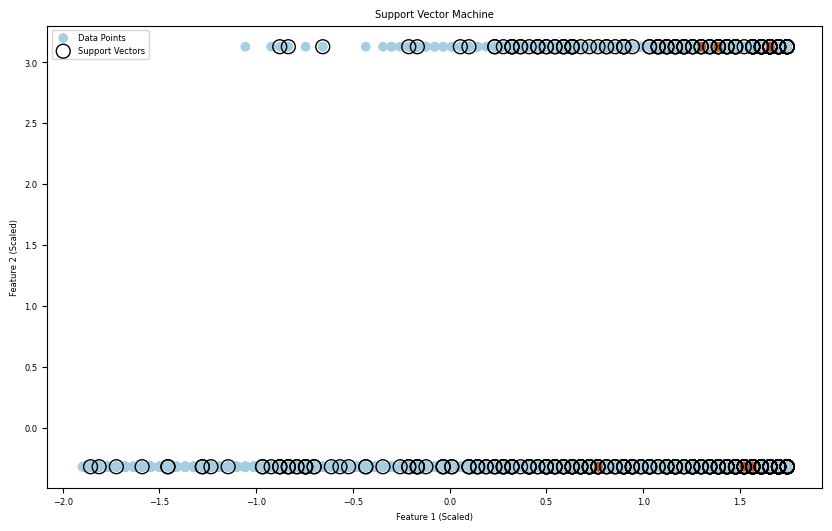

In [102]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

stroke_df.fillna(stroke_df.mean(), inplace=True)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired, label='Data Points')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('Support Vector Machine')
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9460285132382892
